### Data Preprocessing

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bbc_news=pd.read_csv("bbc-text.csv")

### Text Preprocessing

In [2]:
import string
import spacy
import nltk
import re

nltk.download("stopwords")
from nltk.corpus import stopwords

nlp=spacy.load("en_core_web_lg")

class Text_Processing:
    def __init__(self,sentence,drop_stopword=True):
        self.sentence=sentence
        self.drop_stopword=drop_stopword
    
    def lower_case(self,text):
        return text.lower()
    
    def stop_words(self,text):
        if self.drop_stopword == True:
            stop_words=stopwords.words("english")
            words=[word for word in text.split(" ") if word not in stop_words]
            
            return " ".join(words)
        else:
            return text
    
    def lemmatiation(self,text):
        doc=nlp(text)
        words=[word.lemma_ for word in doc]
        return " ".join(words)
        
    def processing_text(self):
        # Remove Punctations
        text=re.sub("[^A-Za-z]"," ",self.sentence)
        
        # Change to lower case
        text=self.lower_case(text)
        return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\coola\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

bbc_news["clean_text"]=bbc_news["text"].apply(lambda text:Text_Processing(text).processing_text())
bbc_news["clean_text"]=bbc_news["clean_text"].apply(lambda text:Text_Processing(text).stop_words(text))
bbc_news["clean_text"]=bbc_news["clean_text"].apply(lambda text:Text_Processing(text).lemmatiation(text))
bbc_news["label"]=le.fit_transform(bbc_news["category"])

## Vectorization

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

X_train,X_test,y_train,y_test= train_test_split(bbc_news["clean_text"],bbc_news["label"],test_size=0.2,random_state=44)
count_vect = CountVectorizer()
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(bbc_news["clean_text"])
count_vect.fit(bbc_news["clean_text"])
X_train_TFIDF = Tfidf_vect.transform(X_train)
X_test_TFIDF = Tfidf_vect.transform(X_test)
X_train_CV = count_vect.transform(X_train)
X_test_CV = count_vect.transform(X_test)


## Build ML Models

In [60]:
# fit the training dataset on the NB classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report


NBModel = MultinomialNB()
SVMModel = svm.SVC(kernel='linear')
DTModel= DecisionTreeClassifier()

Naive Bayes Accuracy Score ->  97.30337078651685
Support Vector Machine Accuracy Score ->  98.20224719101124
Decision Tree Accuracy Score ->  88.76404494382022


In [67]:
from sklearn.model_selection import cross_val_score


scores_acc = cross_val_score(NBModel, X_train_TFIDF, y_train, cv=3, scoring='accuracy')
scores_prec = cross_val_score(NBModel, X_train_TFIDF, y_train, cv=3, scoring='precision_weighted')
scores_rcl = cross_val_score(NBModel, X_train_TFIDF, y_train, cv=3, scoring='recall_weighted')

print("Accuracy: ",scores_acc.mean())
print("Precision: ", scores_prec.mean())
print("Recall: ",scores_rcl.mean())

Accuracy:  0.9573105989632128
Precision:  0.9582507100235574
Recall:  0.9573105989632128


In [68]:
from sklearn.model_selection import cross_val_score


scores_acc = cross_val_score(SVMModel, X_train_TFIDF, y_train, cv=3, scoring='accuracy')
scores_prec = cross_val_score(SVMModel, X_train_TFIDF, y_train, cv=3, scoring='precision_weighted')
scores_rcl = cross_val_score(SVMModel, X_train_TFIDF, y_train, cv=3, scoring='recall_weighted')

print("Accuracy: ",scores_acc.mean())
print("Precision: ", scores_prec.mean())
print("Recall: ",scores_rcl.mean())

Accuracy:  0.9730355834908955
Precision:  0.9732936829954492
Recall:  0.9730355834908955


## Evaluation and Choice of ML Model using Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score


scores_acc = cross_val_score(DTModel, X_train_TFIDF, y_train, cv=3, scoring='accuracy')
scores_prec = cross_val_score(DTModel, X_train_TFIDF, y_train, cv=3, scoring='precision_weighted')
scores_rcl = cross_val_score(DTModel, X_train_TFIDF, y_train, cv=3, scoring='recall_weighted')

print("Accuracy: ",scores_acc.mean())
print("Precision: ", scores_prec.mean())
print("Recall: ",scores_rcl.mean())

Accuracy:  0.8297940998896592
Precision:  0.8269313730157108
Recall:  0.8309192733026348


## SVM Classification Evaluation

In [74]:
SVMModel.fit(X_train_TFIDF,y_train)
predictions_SVM = SVMModel.predict(X_test_TFIDF)

print("SVM Classification using TFIDF Vectorizer Report  : ")
print(classification_report(predictions_NB, y_test))
print("Overall Accuracy Score : ",accuracy_score(predictions_SVM, y_test)*100)

SVM Classification using TFIDF Vectorizer Report  : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        86
           1       0.98      1.00      0.99        83
           2       0.99      0.99      0.99        91
           3       1.00      1.00      1.00       107
           4       1.00      0.96      0.98        78

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445

Overall Accuracy Score :  98.20224719101124


## Extras

In [86]:
bbc_news.head(n=5)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


<AxesSubplot:xlabel='category', ylabel='count'>

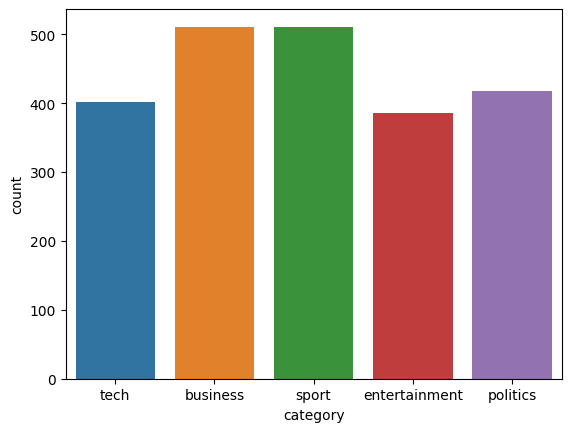

In [78]:
sns.countplot(x = "category", data = bbc_news)

In [87]:
bbc_news["clean_text"]=bbc_news["text"].apply(lambda text:Text_Processing(text).processing_text())
bbc_news.head(n=5)

,category,text,clean_text
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...


In [88]:
bbc_news["clean_text"]=bbc_news["clean_text"].apply(lambda text:Text_Processing(text).stop_words(text))
bbc_news.head(n=5)

,category,text,clean_text
0,tech,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems ...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say rus...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cr...


In [89]:
bbc_news["clean_text"]=bbc_news["clean_text"].apply(lambda text:Text_Processing(text).lemmatiation(text))
bbc_news.head(n=5)


,category,text,clean_text
0,tech,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system pl...
1,business,worldcom boss left books alone former worldc...,worldcom boss leave book alone former worl...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say ru...
3,sport,yeading face newcastle in fa cup premiership s...,yeade face newcastle fa cup premiership side n...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve cr...
